# week 6: visualizing time series data

## Assignment Content

 Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

## Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.

In [1]:
# Python current version
!python --version

Python 3.8.5


In [2]:
# Importing Pandas
import pandas as pd

## Reading Data Files using Pandas Data Frame

In [3]:
# Reading multiple files of data to the data frames using pandas
df1 = pd.read_csv('RollingSystemDemand_20221025_1759.csv')
df2 = pd.read_csv('RollingSystemDemand_20221025_1800.csv')
df1.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20221006234000,23973.0
VD,20221006234500,24006.0
VD,20221006235000,24025.0
VD,20221006235500,23953.0
FTR,1728,NaN


In [4]:
# Dropping the last NaN row from the data frames
df1.drop(df1.tail(1).index,inplace=True)
df2.drop(df2.tail(1).index,inplace=True)
df2.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20221012233500,27877.0
VD,20221012234000,27785.0
VD,20221012234500,27744.0
VD,20221012235000,27651.0
VD,20221012235500,27496.0


In [5]:
# displaying the data frame after removing NaN values
df1.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20221006233500,23563.0
VD,20221006234000,23973.0
VD,20221006234500,24006.0
VD,20221006235000,24025.0
VD,20221006235500,23953.0


## Append both the data frames (data files) to a single data frame

In [6]:
# Appending data frames to the new data frame 
df3 = df1.append([df1,df2])

In [7]:
#displaying the sammple data in the appended new data frame
df3.tail()

,HDR,ROLLING SYSTEM DEMAND
VD,20221012233500,27877.0
VD,20221012234000,27785.0
VD,20221012234500,27744.0
VD,20221012235000,27651.0
VD,20221012235500,27496.0


In [8]:
# Converting the 'HDR' values to the str (object) data type 
df3['HDR'] = df3['HDR'].astype(str)
# displaying the data frame df3 info
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5184 entries, VD to VD
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HDR                    5184 non-null   object 
 1   ROLLING SYSTEM DEMAND  5184 non-null   float64
dtypes: float64(1), object(1)
memory usage: 121.5+ KB


## Extracting Date, Time, and Hours from the existing data 'HDR' column 

In [9]:
df_new = pd.DataFrame(df3["HDR"])

# New Columns creation for Date, Time & Hours

df3["Date"] = pd.to_datetime(df_new["HDR"]).dt.date
df3["Time"] = pd.to_datetime(df_new["HDR"]).dt.time
df3["Hours"] = pd.to_datetime(df_new["HDR"]).dt.hour
df3

,HDR,ROLLING SYSTEM DEMAND,Date,Time,Hours
VD,20221001000000,22126.0,2022-10-01,00:00:00,0
VD,20221001000500,22259.0,2022-10-01,00:05:00,0
VD,20221001001000,22597.0,2022-10-01,00:10:00,0
VD,20221001001500,22258.0,2022-10-01,00:15:00,0
VD,20221001002000,22173.0,2022-10-01,00:20:00,0
...,...,...,...,...,...
VD,20221012233500,27877.0,2022-10-12,23:35:00,23
VD,20221012234000,27785.0,2022-10-12,23:40:00,23
VD,20221012234500,27744.0,2022-10-12,23:45:00,23
VD,20221012235000,27651.0,2022-10-12,23:50:00,23


## Bar graphs of the power consumption per hour - Bar graph with 24 bars

<AxesSubplot:title={'center':'Consumption of Power on Hourly basis'}, xlabel='Hours', ylabel='Consumption of Power'>

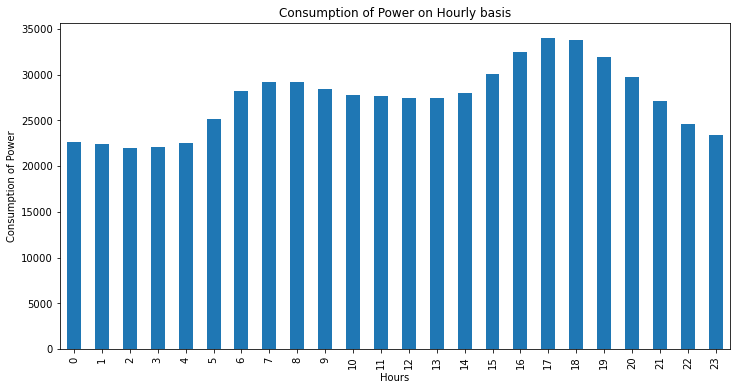

In [10]:
# Bar graph has 24 bars; each bar is the average across all days for that hour

df_hours = df3.groupby(['Hours'])['ROLLING SYSTEM DEMAND'].mean()
df_hours.plot(
    kind='bar', 
    title='Consumption of Power on Hourly basis', 
    ylabel='Consumption of Power',
    xlabel='Hours', 
    figsize=(12, 6)
)

## Bar graphs of the power consumption per hour - Bar graph has 24*(number of days) bars, choice of average or sum for each hour

<AxesSubplot:title={'center':'Average Hourly Consumption over given number of days'}, xlabel='Hours and date', ylabel='Usage of Power'>

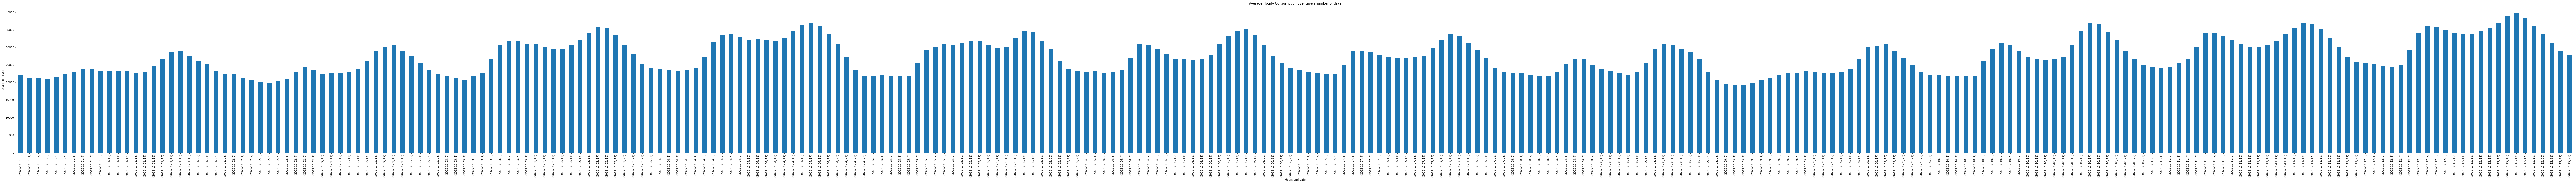

In [11]:
df_days = df3.groupby(['Date','Hours'])['ROLLING SYSTEM DEMAND'].mean()
df_days.plot(
    kind='bar', 
    title='Average Hourly Consumption over given number of days', 
    ylabel='Usage of Power',
    xlabel='Hours and date', 
    figsize=(170,10)
)